<a href="https://colab.research.google.com/github/Evanaxander/Medical-insurance-cost-prediction/blob/main/Diabetes_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
folder= "D:\Evan\diabetes"
import pandas as pd
diabetes = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]>

In [ ]:
folder= "D:\Evan\diabetes"
import pandas as pd
pd.read_csv('/content/diabetes.csv')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#cleaning Data

# Fix the typo by separating the variable assignment from diabetes.columns
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#diabetes.head()

In [ ]:
import tensorflow as tf
num_prog = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
skin_thick = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


<Axes: >

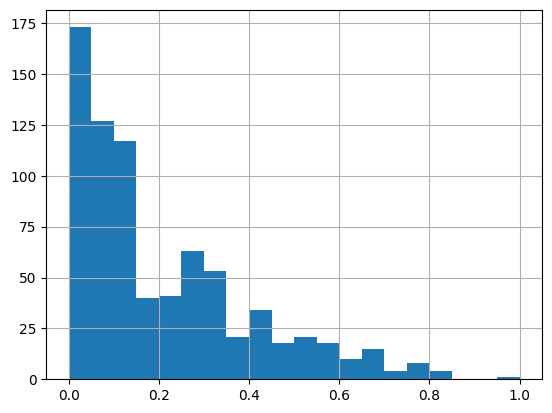

In [ ]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('assigned_group', ['A', 'B', 'C', 'D'])
import matplotlib.pyplot as plt
%matplotlib inline
diabetes['Age'].hist(bins=20)

In [ ]:
# Use tf to call bucketized_column
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

# Define feature columns as a list
feature_columns = [num_prog ,plasma_gluc, dias_press, skin_thick, insulin, bmi, pedigree, age, assigned_group, age_buckets]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
# Check the actual column names in the DataFrame
print(diabetes.columns)

# Assuming the column name is 'Outcome', use the correct name in the drop function:
x_data = diabetes.drop('Outcome', axis=1)

# Proceed with the rest of your code
labels = diabetes['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_data, labels, test_size=0.3, random_state=101
)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
import tensorflow as tf



In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf

# Convert Pandas DataFrame to TensorFlow Dataset
def input_func(features, labels, batch_size=10, num_epochs=1000, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(features))
    dataset = dataset.batch(batch_size).repeat(num_epochs)
    return dataset

# Assuming X_train and y_train are Pandas DataFrames
train_input_fn = lambda: input_func(X_train, y_train, batch_size=10, num_epochs=1000)

# Define feature columns (replace this with your actual feature columns)
feature_columns = [...]  # Example: [tf.feature_column.numeric_column(key='feature_name')]

# Initialize the LinearClassifier estimator
model = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=2)

# Train the model using the new input function
model.train(input_fn=train_input_fn)


AttributeError: module 'tensorflow' has no attribute 'estimator'

In [ ]:
import tensorflow as tf

# Convert Pandas DataFrame to TensorFlow Dataset
def input_func(features, labels, batch_size=10, num_epochs=1000, shuffle=True):
    # Convert features and labels to numpy arrays
    features = features.values
    labels = labels.values
    dataset = tf.data.Dataset.from_tensor_slices((features, labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(features))
    dataset = dataset.batch(batch_size).repeat(num_epochs)
    return dataset

# Assuming X_train and y_train are Pandas DataFrames
train_input_fn = lambda: input_func(X_train, y_train, batch_size=10, num_epochs=1000)

# Build a simple linear classification model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(len(X_train.columns),))
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the dataset using the input function
train_dataset = input_func(X_train, y_train, batch_size=10)

# Train the model using the dataset
model.fit(train_dataset, epochs=1000, steps_per_epoch=len(X_train) // 10)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3799 - loss: 0.7146
Epoch 2/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4782 - loss: 0.6945
Epoch 3/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5556 - loss: 0.6875
Epoch 4/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6529 - loss: 0.6798
Epoch 5/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6590 - loss: 0.6628
Epoch 6/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6831 - loss: 0.6569
Epoch 7/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6175 - loss: 0.6725
Epoch 8/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6017 - loss: 0.6754
Epoch 9/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6973 - loss: 0.6415
Epoch 10/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6323 - loss: 0.6569
Epoch 11/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6641 - loss: 0.6508
Epoch 12/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 